<a href="https://colab.research.google.com/github/vishwesh5/Simplilearn-Masters/blob/master/Machine_Learning/Practice_Projects/Boston_Homes_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Homes I

## DESCRIPTION

A real estate company wants to build homes at different locations in Boston. They have data for historical prices but haven’t decided the actual prices yet. They want to price the homes so that they are affordable to the general public.

## OBJECTIVE

- Import the Boston data from sklearn and read the description using DESCR.
- Analyze the data and predict the approximate prices for the houses.

The required data set for this project is inbuilt in Python sklearn package



In [10]:
# Import modules
import sklearn
from sklearn.datasets import load_boston
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = load_boston()

In [3]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
X = data.data
y = data.target

In [13]:
df = pd.DataFrame(data = np.c_[X,y],
                  columns = list(data.feature_names) + ["target"])

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
df.shape

(506, 14)

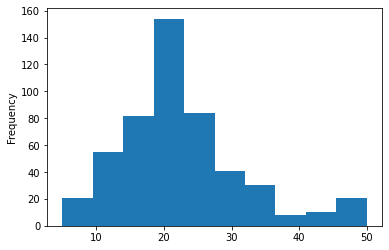

In [16]:
df.target.plot(kind='hist')

The above plot shows that most of the house-prices lie around 20,000 USD. Let's check for outliers.

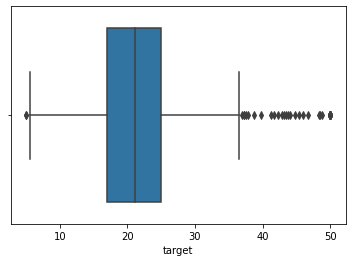

In [17]:
sns.boxplot(x=df.target)

In [20]:
print("Percentage of outliers: {:.2f}%".format(df[df.target>40].shape[0]/df.shape[0] * 100))

Percentage of outliers: 6.13%


Because we have a small dataset (506 samples only), we can't remove the outliers.

Let's check for correlation.

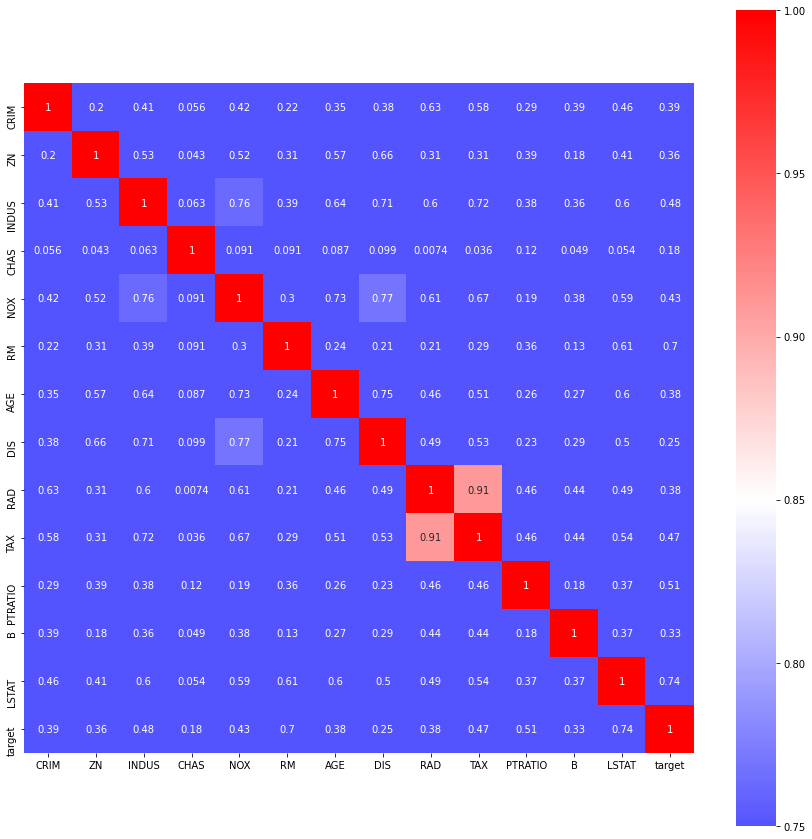

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(abs(df.corr()),square=True,cmap="bwr",annot=True,center=0.85,vmin=0.75,vmax=1)
plt.show()

There is a high correlation between TAX and RAD columns. Since TAX has a higher correlation with target as compared to RAD, we can drop the RAD column and use the rest for fitting a model.

In [27]:
X = df.drop(["RAD","target"],axis=1)
y = df["target"]

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [32]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lr.coef_, lr.intercept_

(array([-7.36093691e-02,  4.10715445e-02, -1.08440334e-01,  4.14546136e+00,
        -1.25711797e+01,  4.13006962e+00,  2.55069227e-03, -1.62491021e+00,
         9.65427446e-04, -6.35181814e-01,  8.31506353e-03, -5.93033163e-01]),
 26.24648519223994)

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
print("train RMSE = {}".format(np.sqrt(mean_squared_error(y_train,lr.predict(X_train)))))

train RMSE = 4.766192467834591


In [38]:
print("test RMSE = {}".format(np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))))

test RMSE = 4.991085258857147
